In [35]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, metrics, model_selection, preprocessing

In [17]:
df = pd.read_csv('shoe_purchases.csv')

In [18]:
df.head()

,Unnamed: 0,length,width,arch_height,shoe_style,length_size,width_size
0,98997,0.256731,0.101506,0.006984,a,9.0,8
1,122297,0.268566,0.099163,0.014081,m,10.5,6
2,98548,0.293950,0.112757,0.009507,a,13.0,8
3,98854,0.265916,0.097520,0.008928,a,10.5,6
4,100188,0.247930,0.091478,0.013734,a,8.0,6


In [19]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [20]:
df1 = df
df1['shoe_style_dummy'] = pd.get_dummies(df1['shoe_style'], drop_first=True)
df1.drop(['shoe_style'], axis = 1, inplace = True)
df1.head()

,length,width,arch_height,length_size,width_size,shoe_style_dummy
0,0.256731,0.101506,0.006984,9.0,8,0
1,0.268566,0.099163,0.014081,10.5,6,1
2,0.293950,0.112757,0.009507,13.0,8,0
3,0.265916,0.097520,0.008928,10.5,6,0
4,0.247930,0.091478,0.013734,8.0,6,0


In [22]:
df1.corr()

,length,width,arch_height,length_size,width_size,shoe_style_dummy
length,1.000000,0.618840,-0.073162,0.945074,-0.036001,0.042322
width,0.618840,1.000000,0.075356,0.616401,0.505318,0.157029
arch_height,-0.073162,0.075356,1.000000,-0.041089,0.120131,0.335764
length_size,0.945074,0.616401,-0.041089,1.000000,-0.017341,0.018283
width_size,-0.036001,0.505318,0.120131,-0.017341,1.000000,0.042771
shoe_style_dummy,0.042322,0.157029,0.335764,0.018283,0.042771,1.000000


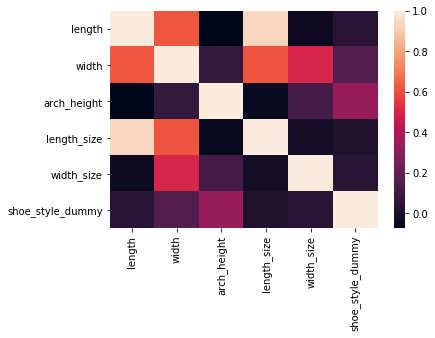

In [23]:
corr = df1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [85]:
#First Model

In [25]:
y = df[['shoe_style_dummy','length_size','width_size']]
X = df[['length','width','arch_height']]

In [26]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=12)

In [27]:
dtree = tree.DecisionTreeRegressor(criterion='gini', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [28]:
y_pred = dtree.predict(X_test)

In [31]:
y_pred_df = pd.DataFrame(y_pred)

In [33]:
y_pred_df['shoe_style_pred']=y_pred_df[0].round().astype(int)

In [36]:
def ceil_length_size(val):
    return math.ceil(val*2)/2

In [37]:
y_pred_df['length_size_pred']=y_pred_df[1].apply(ceil_length_size)

In [38]:
def round_up_to_even(f):
    return round(f / 2.) * 2

In [39]:
y_pred_df['width_size_pred']=y_pred_df[2].apply(round_up_to_even)

In [42]:
y_pred_df.drop([0,1,2], axis = 1, inplace = True)

In [53]:
y_test_np = y_test.values

In [54]:
y_pred_df_np = y_pred_df.values

In [59]:
y_test_np[:,0]

array([0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0.])

In [64]:
count_misclassified = (y_test_np[:,0] != y_pred_df_np[:,0]).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test_np[:,0], y_pred_df_np[:,0])
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 17
Accuracy: 0.72


In [84]:
count_misclassified = (y_test_np[:,1] != y_pred_df_np[:,1]).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.mean_squared_error(y_test_np[:,1], y_pred_df_np[:,1])
print('MSE:', accuracy)

Misclassified samples: 39
MSE: 0.475


In [68]:
count_misclassified = (y_test_np[:,2] != y_pred_df_np[:,2]).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test_np[:,2], y_pred_df_np[:,2])
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 19
Accuracy: 0.68


In [86]:
#Second Model

In [71]:
dtree1 = tree.DecisionTreeRegressor(max_depth=5, random_state=0)
dtree1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [72]:
y_pred1 = dtree1.predict(X_test)

In [73]:
y_pred_df1 = pd.DataFrame(y_pred1)

In [74]:
y_pred_df1['shoe_style_pred']=y_pred_df1[0].round().astype(int)

In [36]:
def ceil_length_size(val):
    return math.ceil(val*2)/2

In [75]:
y_pred_df1['length_size_pred']=y_pred_df1[1].apply(ceil_length_size)

In [38]:
def round_up_to_even(f):
    return round(f / 2.) * 2

In [76]:
y_pred_df1['width_size_pred']=y_pred_df1[2].apply(round_up_to_even)

In [77]:
y_pred_df1.drop([0,1,2], axis = 1, inplace = True)

In [53]:
y_test_np = y_test.values

In [78]:
y_pred_df_np1 = y_pred_df1.values

In [59]:
y_test_np[:,0]

array([0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0.])

In [79]:
count_misclassified = (y_test_np[:,0] != y_pred_df_np1[:,0]).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test_np[:,0], y_pred_df_np1[:,0])
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 17
Accuracy: 0.72


In [87]:
count_misclassified = (y_test_np[:,1] != y_pred_df_np1[:,1]).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.mean_squared_error(y_test_np[:,1], y_pred_df_np1[:,1])
print('MSE', accuracy)

Misclassified samples: 41
MSE 0.4083333333333333


In [81]:
count_misclassified = (y_test_np[:,2] != y_pred_df_np1[:,2]).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test_np[:,2], y_pred_df_np1[:,2])
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 14
Accuracy: 0.77
